# Machine Learning Internship(Bharat Intern)

## Topic: Iris Flower Classification



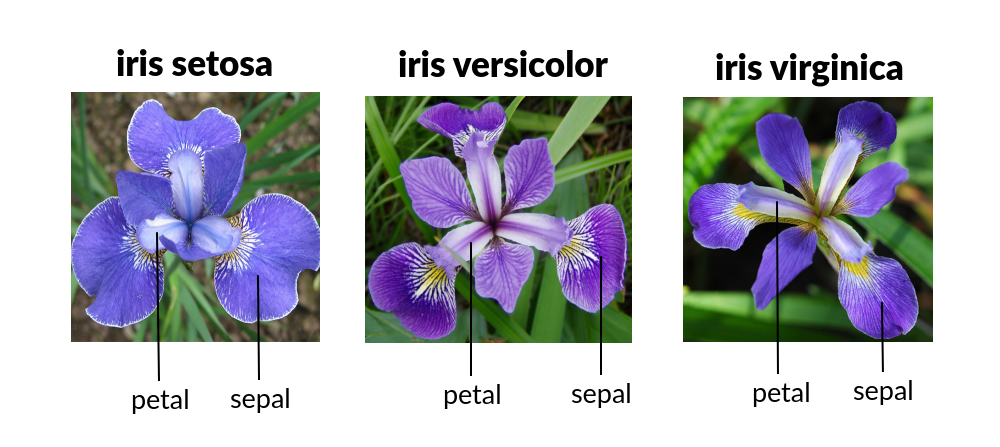

### Overview

The Iris dataset is a classic and well-known dataset in the field of machine learning. It comprises information about three different species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. This dataset is often employed for various tasks such as classification, pattern recognition, and data visualization.

### Objective

The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, 'Sepal length', 'Sepal width', 'Petal length', 'Petal width'. The aim of the iris flower classification is to predict flowers based on their specific features 


 ### Classification Algorithm 
  
  As we know, the Supervised Machine Learning algorithm can be broadly classified into Regression and Classification Algorithms. In Regression algorithms, we have predicted the output for continuous values, but to predict the categorical values, we need Classification algorithms.

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

Unlike regression, the output variable of Classification is a category, not a value, such as "Green or Blue", "fruit or animal", etc. Since the Classification algorithm is a Supervised learning technique, hence it takes labeled input data, which means it contains input with the corresponding output.

The algorithm which implements the classification on a dataset is known as a classifier. There are two types of Classifications:

#### Binary Classifier: 
  
  If the classification problem has only two possible outcomes, then it is called as Binary Classifier.

           Examples: YES or NO, MALE or FEMALE, SPAM or NOT SPAM, CAT or DOG, etc.

#### Multi-class Classifier:
  
  If a classification problem has more than two outcomes, then it is called as Multi-class Classifier.
  
           Example: Classifications of types of crops, Classification of types of music
   
   
#### Learners in Classification Problems:

In the classification problems, there are two types of learners:

##### Lazy Learners:        
            
   Lazy Learner firstly stores the training dataset and wait until it receives the test dataset. In Lazy learner case, classification is done on the basis of the most related data stored in the training dataset. It takes less time in training but more time for predictions.
            
          Example: K-NN algorithm, Case-based reasoning

##### Eager Learners:
             
   Eager Learners develop a classification model based on a training dataset before receiving a test dataset. Opposite to Lazy learners, Eager Learner takes more time in learning, and less time in prediction.
  
          Example: Decision Trees, Naïve Bayes, ANN.


##### Classification Algorithms can be further divided into the Mainly two category:

#### Linear Models

*Logistic Regression

*Support Vector Machines

#### Non-linear Models
*K-Nearest Neighbours

*Kernel SVM

*Naïve Bayes

*Decision Tree Classification

*Random Forest Classification

### Evaluating a Classification model:

Once our model is completed, it is necessary to evaluate its performance; either it is a Classification or Regression model. So for evaluating a Classification model, we have the following ways:

#### 1. Log Loss or Cross-Entropy Loss:

*It is used for evaluating the performance of a classifier, whose output is a probability value between the 0 and 1.

*For a good binary Classification model, the value of log loss should be near to 0.

*The value of log loss increases if the predicted value deviates from the actual value.

*The lower log loss represents the higher accuracy of the model.

#### 2. Confusion Matrix:

*The confusion matrix provides us a matrix/table as output and describes the performance of the model

*It is also known as the error matrix

*The matrix consists of predictions result in a summarized form, which has a total number of correct predictions and incorrect predictions 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

In [3]:
df= pd.read_csv("C:/Users/Bilbin T L/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Drop the Id column as it is not significant here
df=df.drop("Id",axis=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Exploratory Data Analysis

In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

1.sepal length in centimeters
2.sepal width in centimeters
3.petal length in centimeters
4.petal width in centimeters
5.Species

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#Display the number of samples for each species
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
#Converting class labels into numerical form

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

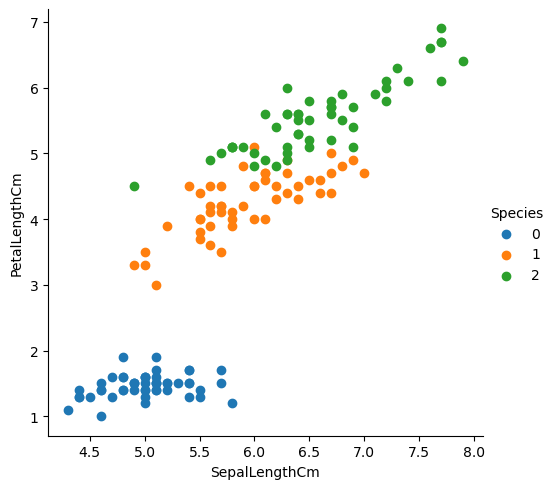

In [9]:
# Plotting the three verities of iris flowers
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalLengthCm','PetalLengthCm').add_legend()

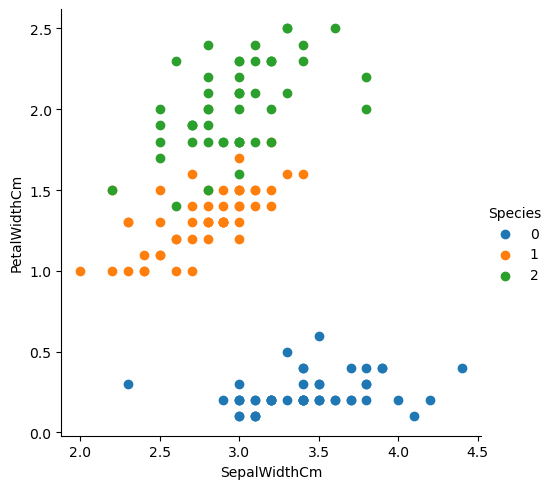

In [10]:
sns.FacetGrid(df,hue='Species',height=5).map(plt.scatter,'SepalWidthCm','PetalWidthCm').add_legend()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


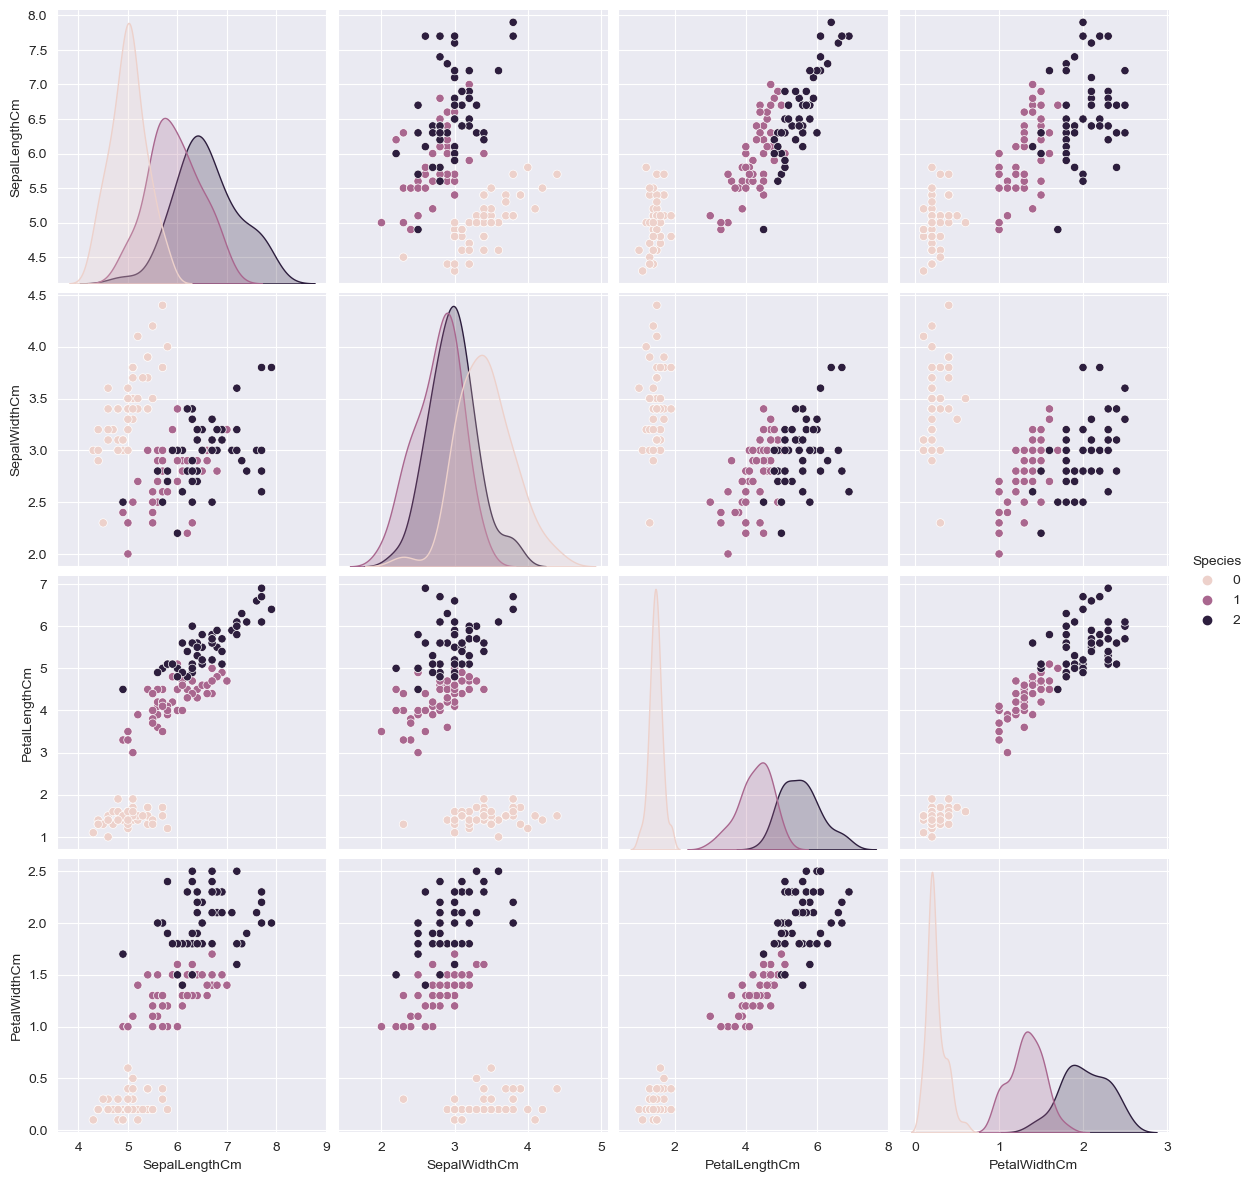

In [11]:
# Pairwise scatter plot: pair plot
#Dis-advantage are 1.can be used when number of features are high.
                #  2.cannot visualize higher dimensional patterns in 3D and 4
plt.close() # closes any previously open plots that might be displayed
sns.set_style("darkgrid")
sns.pairplot(df,hue="Species",size=3)
plt.show()

<Axes: >

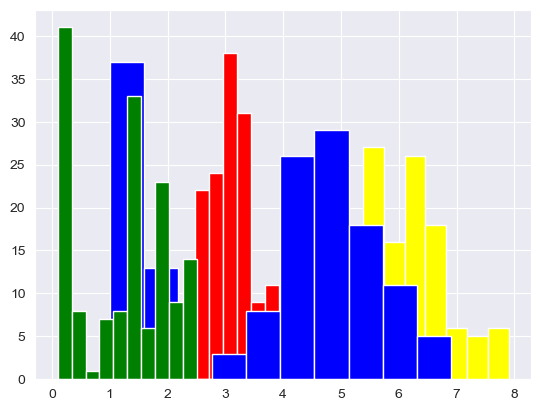

In [12]:
#Plotting histogram for all the features together
df['SepalLengthCm'].hist(color='yellow')
df['SepalWidthCm'].hist(color='red')
df['PetalLengthCm'].hist(color='blue')
df['PetalWidthCm'].hist(color='green')

In [13]:
# Plot scatter plot to visualize relationships between features
species=[0,1,2]
color=['red','orange','blue']

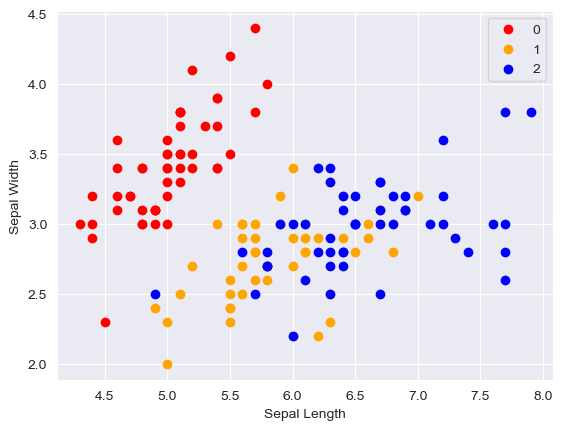

In [14]:
# scatter plot showing relation between Sepal Length and Sepal Width

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

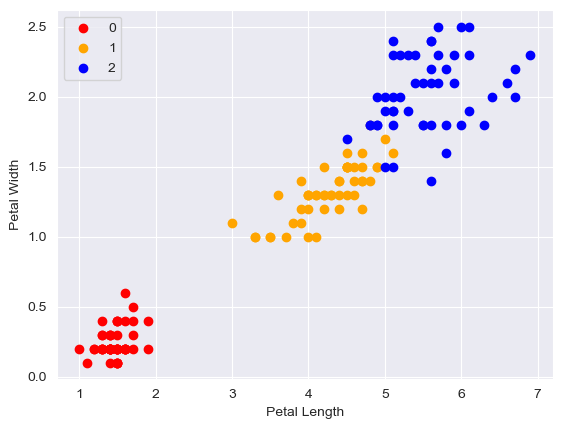

In [15]:
# Scatter plot for Petal Length vs Petal Width 
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

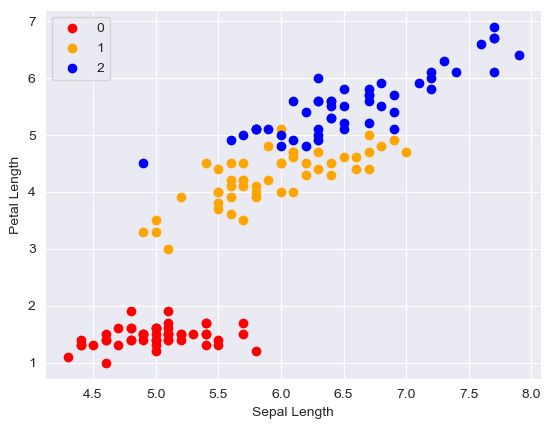

In [16]:

# Scatter plot for Petal Length vs Sepal Length
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

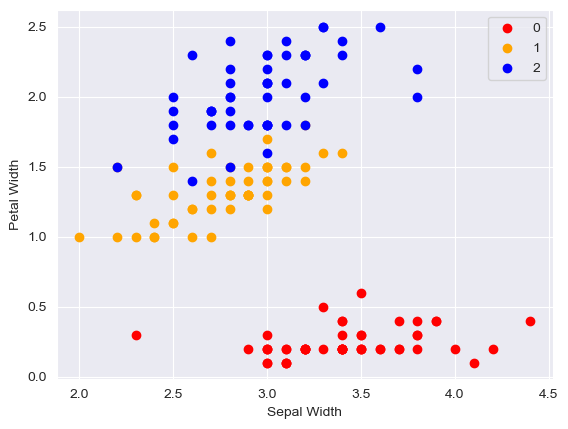

In [17]:
# Scatter plot for Sepal Width vs Petal Width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [18]:
# Finding the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

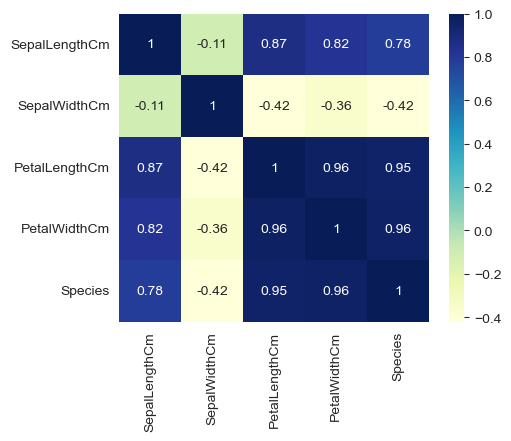

In [19]:
# displaying the correlation matrix using a heatmap
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='YlGnBu') #cmap can be Greens,coolwarm,YlGnBu,RdBu

## Spliting the dataset into Training and Testing data

In [20]:
#splitting the data into features X and target Y
X = df.drop('Species',axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y = df["Species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [22]:
# Doing train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state=1)

 Logistic Regression

In [23]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
lr=round(model1.score(X_test,y_test)*100,2)
lr



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


97.78

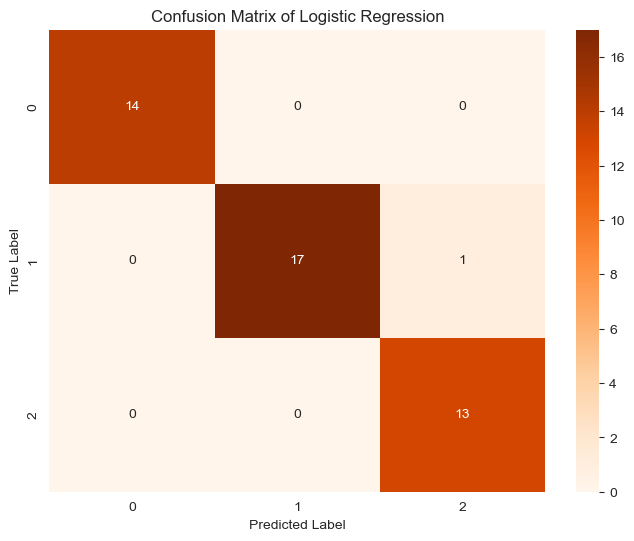

In [41]:
y_pred1=model1.predict(X_test)
conf_matrix1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

K nearest neighbour model

In [25]:
# K-nearest model (KNN)
model2=KNeighborsClassifier()
model2.fit(X_train,y_train)
knn=round(model2.score(X_test,y_test)*100,2)
knn


97.78

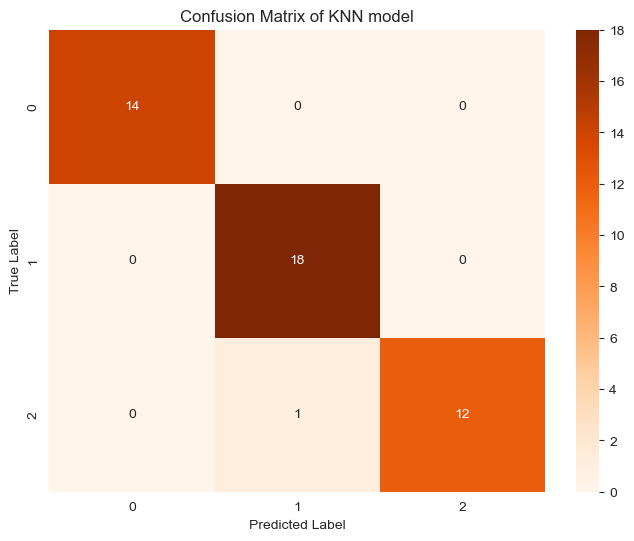

In [26]:
y_pred2=model2.predict(X_test)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN model')
plt.show()

Decision Tree model

In [27]:
#Decision Tree model
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
dt=round(model3.score(X_test,y_test)*100,2)
dt


95.56

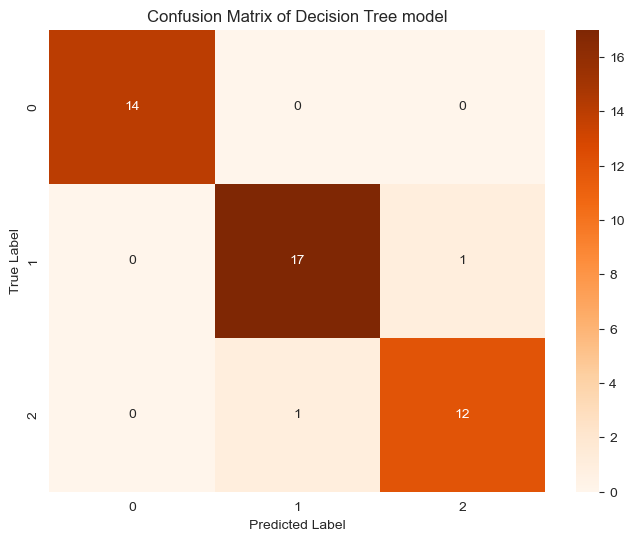

In [28]:
y_pred3=model3.predict(X_test)
conf_matrix3 = confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree model')
plt.show()

Naive Bayes model

In [29]:
# Naive Bayes Model
model4 = GaussianNB()
model4 .fit(X_train, y_train)
y_pred4 = model4 .predict(X_test)
nb=round(model4.score(X_test,y_test)*100)
nb

93

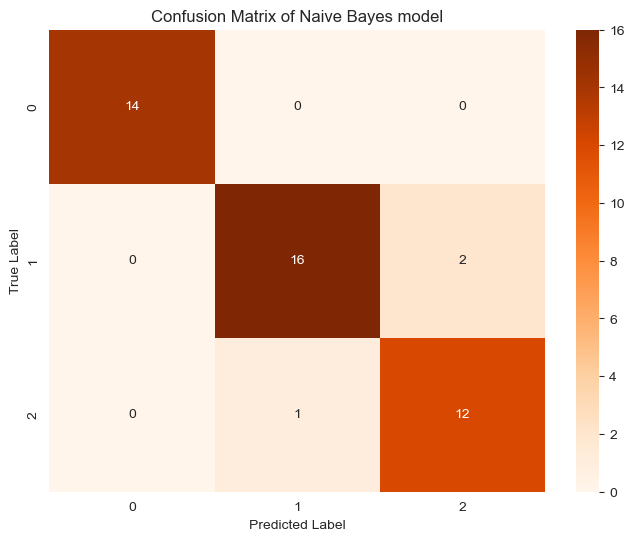

In [30]:

conf_matrix4 = confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Naive Bayes model')
plt.show()

Adaboost classifier model

In [35]:
model5=AdaBoostClassifier(n_estimators=50)
model5 .fit(X_train, y_train)
y_pred5 = model5 .predict(X_test)
ad=round(model5.score(X_test,y_test)*100)
ad

96

In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','Decision Tree Classifier','Naive Bayes','Adaboost classifier'],
    'Score': [lr,knn,dt,nb,ad]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,97.78
1,knn,97.78
4,Adaboost classifier,96.00
2,Decision Tree Classifier,95.56
3,Naive Bayes,93.00


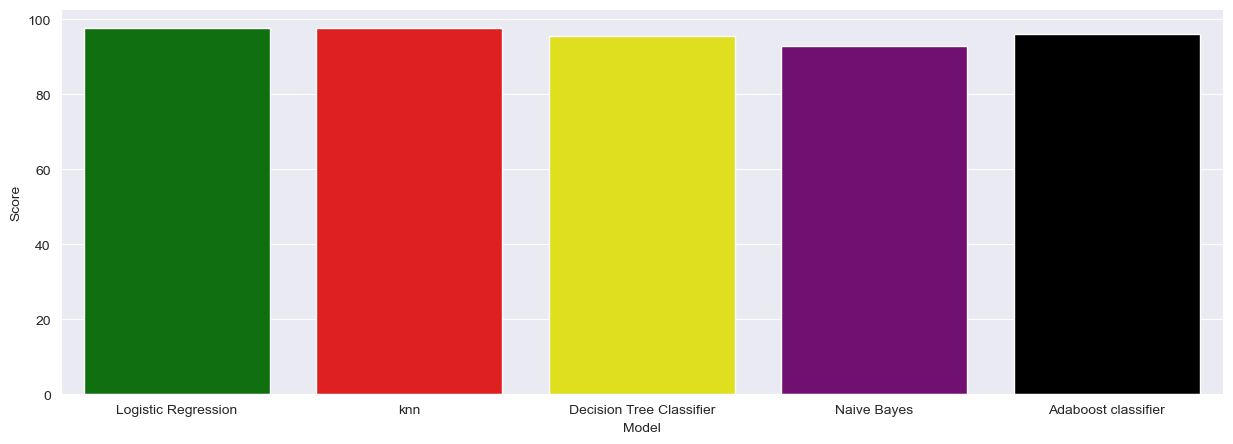

In [37]:
colors = [ "green", "red", "yellow","purple","black"]

sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

On analyzing the classification models we can conclude that logistic model and K nearest neighbour model has significant percent of accuracy  